In [ ]:
import os
import pandas as pd
import numpy as np
from scipy.stats import pearsonr #pour calculer correlation
import matplotlib.pyplot as plt #pour visualiser les donnees
from sklearn.decomposition import PCA #pour analyser et visualiser des données 
from sklearn.preprocessing import StandardScaler #pour centrer et reduire 

In [ ]:
#importation des donnees
Covid19='/content/drive/MyDrive/Coronavirus 03-2021.xlsx'
Covid19_df= pd.read_excel(Covid19,sheet_name=0, header=0, index_col=0)
Covid19_df

,Cases,Deaths,Recovered,ActiveCases,Critical,Tests,Population
Country,,,,,,,
USA,30434541,554196.000,22612032,7268313,9054,387534674,332389130
Brazil,11877009,290525.000,10383460,1203024,8318,28600000,213638142
Russia,4447570,94659.000,4060652,292259,2300,117000000,145979262
France,4181607,91679.000,278263,3811665,4246,58498845,65376842
Italy,3356331,104642.000,2686236,565453,3387,46613817,60398128
Spain,3212332,72910.000,2945446,193976,1997,41114319,46767743
Turkey,2971633,29864.000,2788757,153012,1547,35975339,84985927
Germany,2648775,75104.000,2409700,163971,2848,47578793,83975524
Argentina,2234913,54476.000,2016729,163708,3534,8251376,45491590


In [ ]:
#Dimension de la matrice
Covid19_df.shape


(50, 7)

In [ ]:
#Nombre d'individus
n=Covid19_df.shape[0]
n

50

In [ ]:
#Nombre de variables
p=Covid19_df.shape[1]
p

7

In [ ]:
#Centrer et reduire la matrice
#instanciation de la classe standardisation
sc= StandardScaler()
X=sc.fit_transform(Covid19_df)
X

array([[ 6.34838002e+00,  5.91652321e+00,  6.16620032e+00,
         6.11411633e+00,  4.18455185e+00,  6.11428543e+00,
         1.26298607e+00],
       [ 2.26536681e+00,  2.92038316e+00,  2.63676931e+00,
         7.92895809e-01,  3.80009594e+00,  1.00936510e-01,
         6.85397136e-01],
       [ 6.30747638e-01,  6.94723280e-01,  8.11869828e-01,
        -6.13972035e-03,  6.56542045e-01,  1.58193036e+00,
         3.56313385e-01],
       [ 5.72230674e-01,  6.60861015e-01, -2.79809646e-01,
         3.08151784e+00,  1.67305183e+00,  6.01841550e-01,
        -3.57260155e-02],
       [ 3.90654114e-01,  8.08161869e-01,  4.15183571e-01,
         2.33539793e-01,  1.22434581e+00,  4.02727824e-01,
        -5.99418151e-02],
       [ 3.58971570e-01,  4.47585559e-01,  4.89997197e-01,
        -9.23657050e-02,  4.98267397e-01,  3.10592952e-01,
        -1.26238186e-01],
       [ 3.06013171e-01, -4.15537264e-02,  4.44773354e-01,
        -1.28304384e-01,  2.63206038e-01,  2.24497954e-01,
         5.9649953

In [ ]:
#Les moyennes
np.mean(X,axis=0)

array([ 1.77635684e-17, -5.88418203e-17, -9.99200722e-18, -1.55431223e-17,
        7.54951657e-17,  2.44249065e-17, -1.55431223e-17])

In [ ]:
#Les ecart type
np.std(X,axis=0)

array([1., 1., 1., 1., 1., 1., 1.])

In [ ]:
acp=PCA()
#Les coordonnees Factorielles
V=acp.fit_transform(X)
#Afficher matrice de correlation
print(V)

[[ 1.43024076e+01 -3.38860060e-01 -1.53824063e+00 -3.88028476e-01
  -8.72514736e-02  6.05243644e-02  8.31466427e-05]
 [ 5.17776020e+00 -9.14861229e-01  2.83705092e+00 -2.56243271e-01
  -6.30851725e-01 -6.15074911e-02 -1.04777499e-04]
 [ 1.81005386e+00  4.58961233e-01 -3.47311620e-02 -6.32871426e-01
   8.38544556e-01 -9.12896951e-02  9.45033075e-05]
 [ 2.47606910e+00 -5.49396624e-01 -4.64689793e-01  2.61682946e+00
   1.94368558e-02 -6.29060014e-02 -1.21217850e-04]
 [ 1.38388689e+00 -3.40840565e-01  6.85083540e-01  1.28813705e-01
   3.56379045e-01 -2.30664523e-01  2.81350600e-04]
 [ 8.02063484e-01 -2.37650724e-01  2.96030085e-01 -3.36384549e-01
   1.91848652e-01 -3.34451246e-02  6.17685247e-06]
 [ 4.42674083e-01  1.78648883e-02  1.60296471e-01 -3.03049818e-01
   1.29677053e-01  3.19782381e-01 -6.58755892e-04]
 [ 9.19787311e-01 -8.40603619e-02  6.28885465e-01 -8.84819264e-02
   4.55049291e-01 -9.43697581e-02  3.00417670e-05]
 [ 5.88311087e-01 -4.62732618e-01  1.09590903e+00  2.48354921e-0

In [ ]:
#L'inertie expliquée par chaque composante : Les valeurs propres
vp=acp.explained_variance_
vp

array([5.51850464e+00, 1.07122404e+00, 3.32809606e-01, 1.70634951e-01,
       4.24423837e-02, 7.24144006e-03, 7.86045992e-08])

In [ ]:
#proportion d'inertie expliquee
print(acp.explained_variance_ratio_)

[7.72590650e-01 1.49971366e-01 4.65933448e-02 2.38888931e-02
 5.94193372e-03 1.01380161e-03 1.10046439e-08]


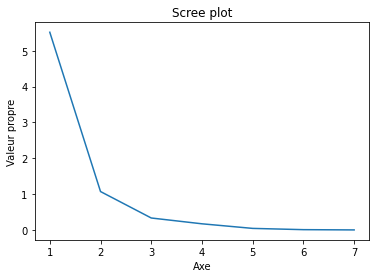

In [ ]:
plt.plot(np.arange(1,p+1),vp)
plt.title("Scree plot")
plt.ylabel("Valeur propre")
plt.xlabel("Axe")
plt.show()

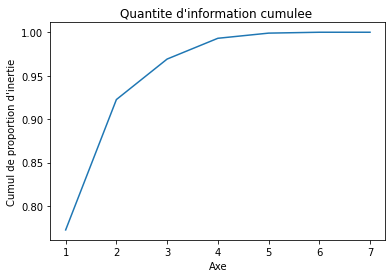

In [ ]:
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Quantite d'information cumulee ")
plt.ylabel("Cumul de proportion d'inertie")
plt.xlabel("Axe")
plt.show()

In [ ]:
#choix des axes: l'axe valide c'est  qui a une vp>seuil
seuil=1/np.arange(p,0,-1) 
seuil=np.cumsum(seuil)
seuil=seuil[::-1]
print(pd.DataFrame({'Val propre':vp, 'Seuils':seuil}))

     Val propre    Seuils
0  5.518505e+00  2.592857
1  1.071224e+00  1.592857
2  3.328096e-01  1.092857
3  1.706350e-01  0.759524
4  4.244238e-02  0.509524
5  7.241440e-03  0.309524
6  7.860460e-08  0.142857


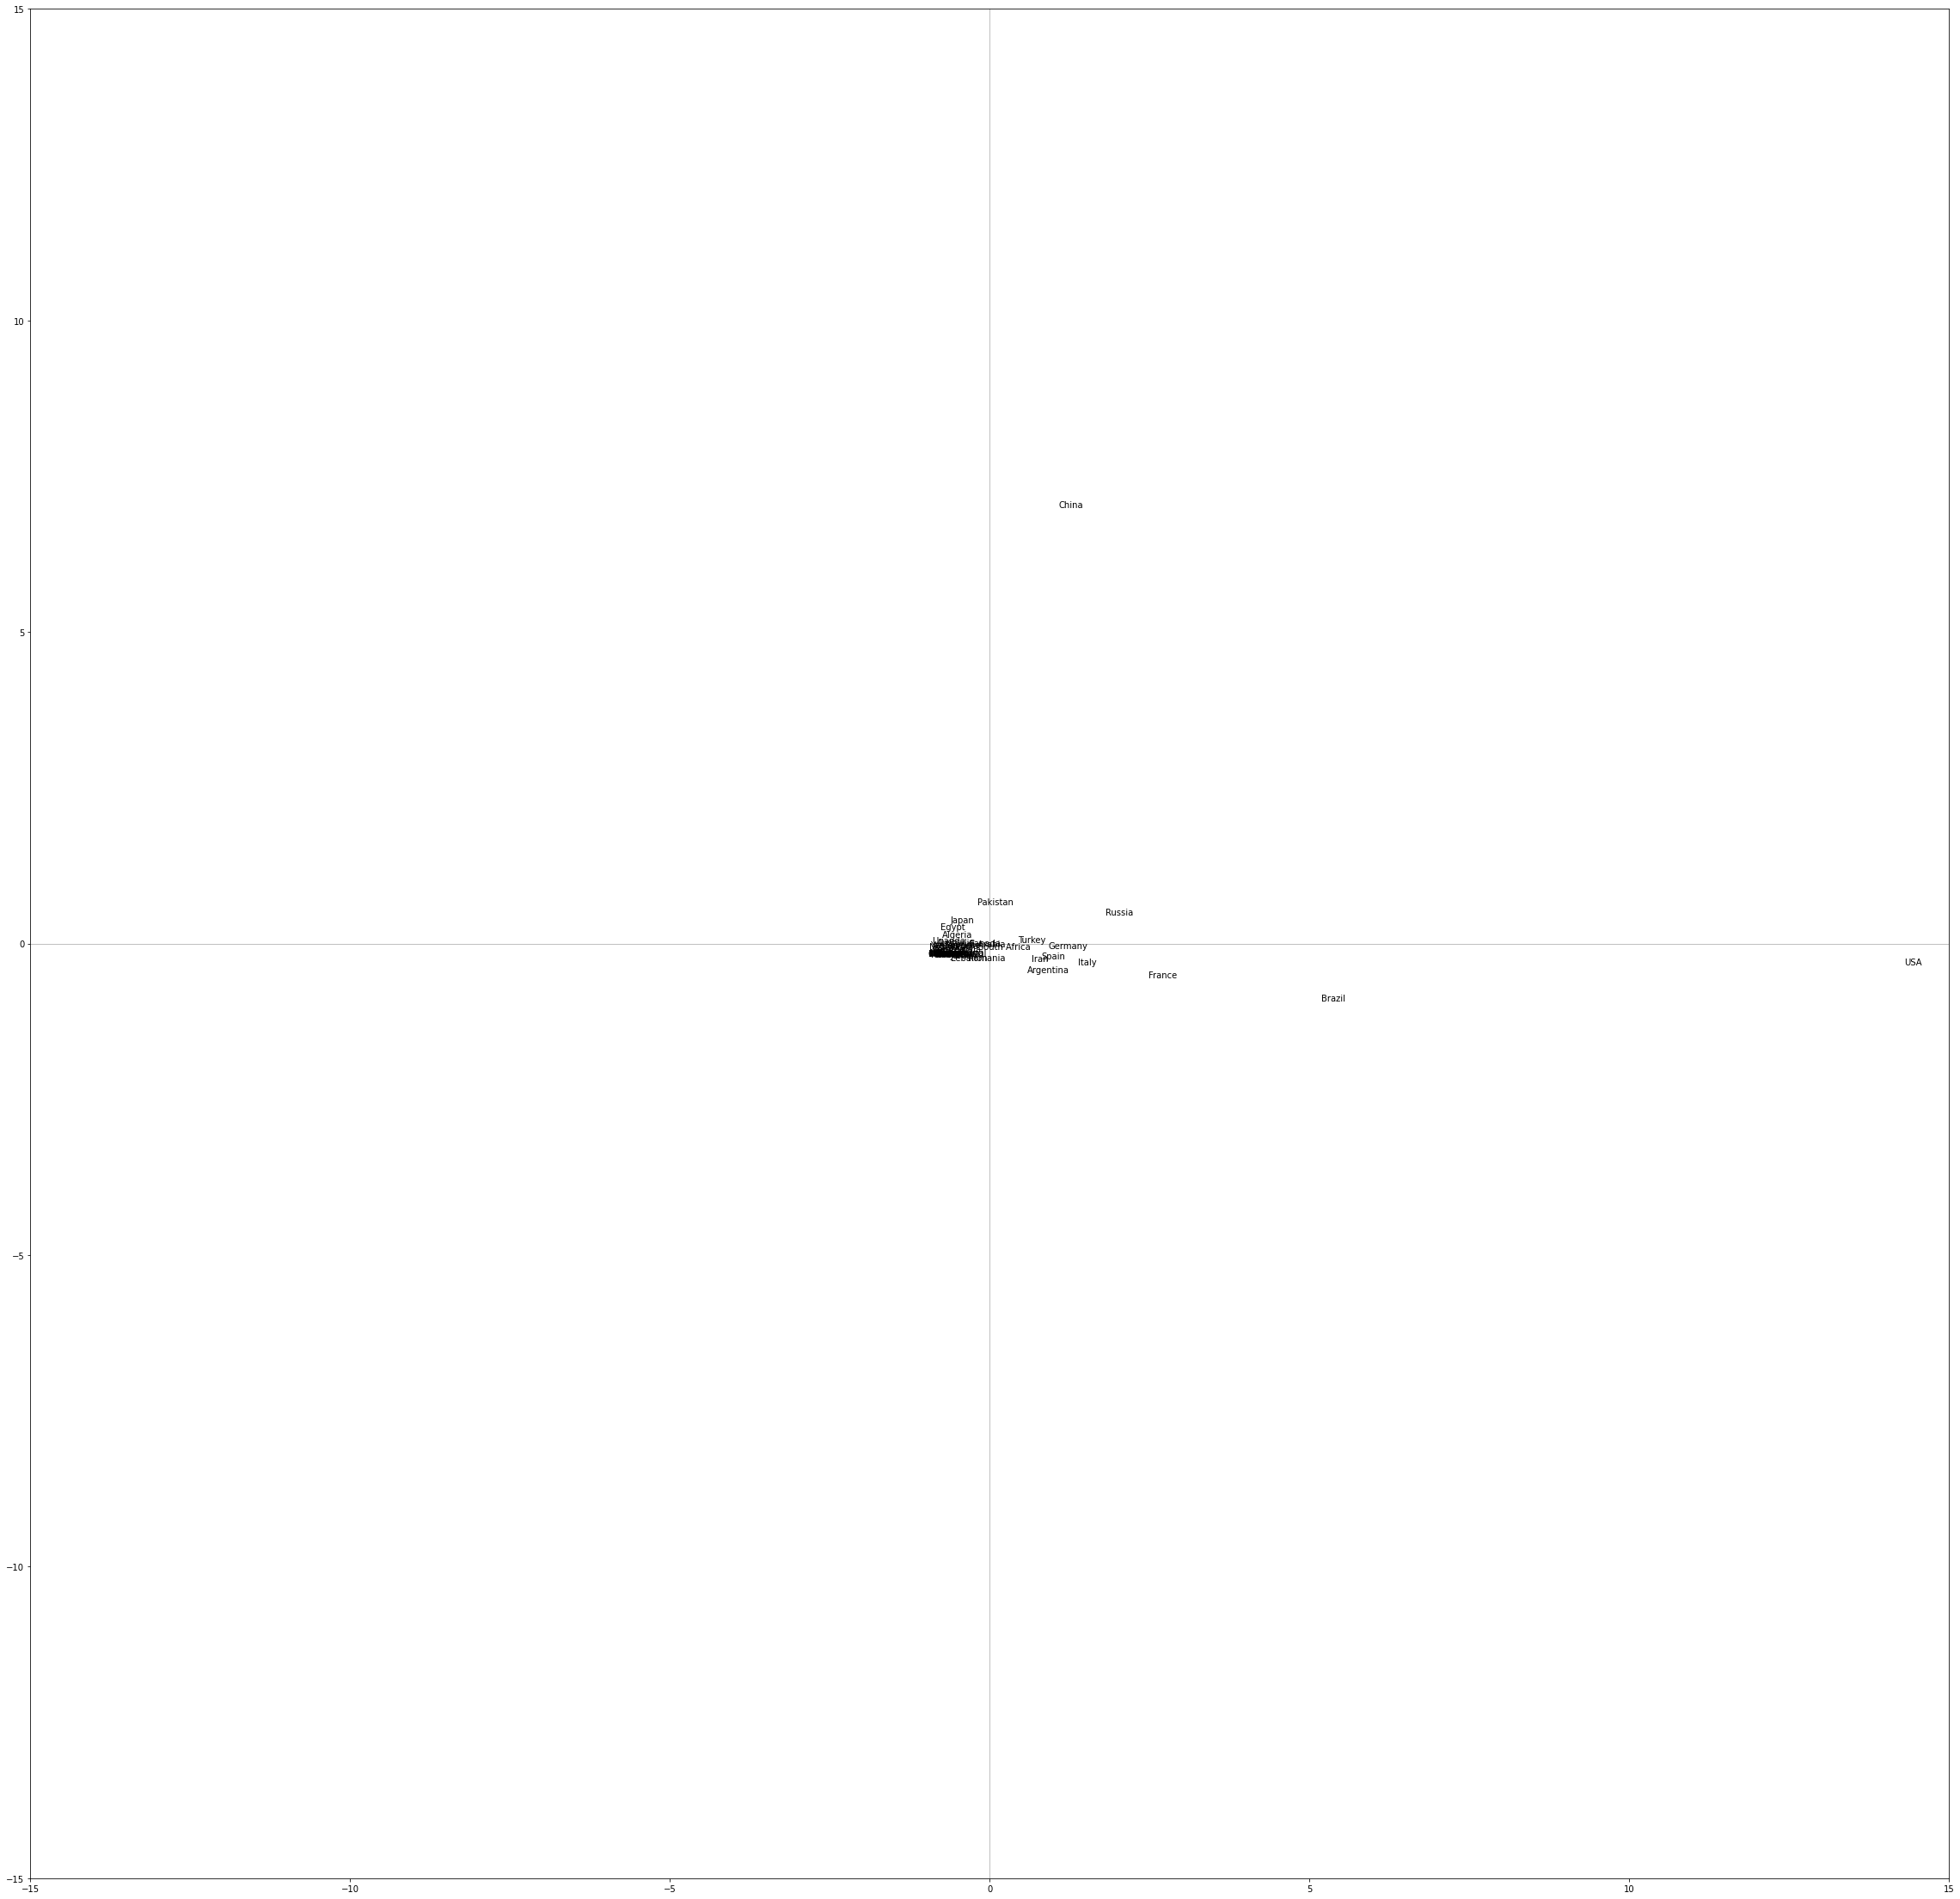

In [ ]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(40,40))
axes.set_xlim(-15,15) #même limites en abscisse
axes.set_ylim(-15,15) #et en ordonnée

#placement des étiquettes des observations
coord = acp.fit_transform(X)
for i in range(n):
 plt.annotate(Covid19_df.index[i],(coord[i,0],coord[i,1]))

#ajouter les axes
plt.plot([-15,15],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-15,15],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

In [ ]:
#contribution des individus dans l'inertie totale
di = np.sum(X**2,axis=1)
print(pd.DataFrame({'Country':Covid19_df.index,'d_i':di}))

         Country         d_i
0            USA  207.201715
1         Brazil   36.162447
2         Russia    4.600164
3         France   13.500823
4          Italy    2.697460
5          Spain    0.938497
6         Turkey    0.432891
7        Germany    1.472376
8      Argentina    1.908890
9           Iran    2.302575
10  South Africa    0.225959
11        Canada    0.191046
12       Romania    0.255264
13      Portugal    0.492595
14          Iraq    0.322148
15      Pakistan    1.187353
16        Jordan    0.443304
17       Morocco    0.528826
18         Japan    0.514136
19       Lebanon    0.475422
20  Saudi Arabia    0.401529
21        Panama    0.771897
22       Georgia    0.858800
23       Croatia    0.818980
24       Tunisia    0.699456
25        Greece    0.528963
26       Ireland    0.785799
27     Palestine    0.797575
28        Kuwait    0.788527
29    Costa Rica    0.827793
30      Slovenia    0.859125
31         Egypt    0.711796
32     Guatemala    0.843014
33         Qat

In [ ]:
#qualité de représentation des individus - COS2
cos2 = V**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'Country':Covid19_df.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

         Country    COS2_1    COS2_2
0            USA  0.987245  0.000554
1         Brazil  0.741355  0.023145
2         Russia  0.712213  0.045791
3         France  0.454114  0.022357
4          Italy  0.709980  0.043067
5          Spain  0.685464  0.060179
6         Turkey  0.452678  0.000737
7        Germany  0.574587  0.004799
8      Argentina  0.181315  0.112171
9           Iran  0.182482  0.035000
10  South Africa  0.137415  0.032722
11        Canada  0.597538  0.005131
12       Romania  0.436974  0.297539
13      Portugal  0.743858  0.076437
14          Iraq  0.921327  0.022795
15      Pakistan  0.031874  0.330832
16        Jordan  0.856769  0.121132
17       Morocco  0.932602  0.008285
18         Japan  0.729932  0.227284
19       Lebanon  0.783270  0.154556
20  Saudi Arabia  0.941816  0.006427
21        Panama  0.872412  0.055783
22       Georgia  0.866726  0.040758
23       Croatia  0.882124  0.051083
24       Tunisia  0.913659  0.051962
25        Greece  0.905874  0.080076
2

In [ ]:
#vérifions la théorie =>Pour chaque individu la somme des cos2 = 1
print(np.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [ ]:
#contributions aux axes
ctr = V**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*vp[j])
 print(pd.DataFrame({'Country':Covid19_df.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

         Country     CTR_1      CTR_2
0            USA  0.741356   0.114826
1         Brazil  0.097161   0.836971
2         Russia  0.011874   0.210645
3         France  0.022219   0.301837
4          Italy  0.006941   0.116172
5          Spain  0.002331   0.056478
6         Turkey  0.000710   0.000319
7        Germany  0.003066   0.007066
8      Argentina  0.001254   0.214121
9           Iran  0.001523   0.080591
10  South Africa  0.000113   0.007394
11        Canada  0.000414   0.000980
12       Romania  0.000404   0.075951
13      Portugal  0.001328   0.037653
14          Iraq  0.001076   0.007344
15      Pakistan  0.000137   0.392814
16        Jordan  0.001376   0.053698
17       Morocco  0.001787   0.004381
18         Japan  0.001360   0.116855
19       Lebanon  0.001350   0.073479
20  Saudi Arabia  0.001371   0.002581
21        Panama  0.002441   0.043059
22       Georgia  0.002698   0.035003
23       Croatia  0.002618   0.041836
24       Tunisia  0.002316   0.036345
25        Gr

In [ ]:
#Analyse Duale: Les variables
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 4.24796039e-01  4.22865075e-01  4.17465685e-01  3.92257960e-01
   3.77978100e-01  3.88924319e-01  1.35867501e-01]
 [-1.06529875e-01 -1.20115414e-01 -1.03599842e-01 -1.00744490e-01
  -1.64899816e-01  3.00655359e-01  9.14196751e-01]
 [-7.54004437e-02  1.34179700e-01  5.04614313e-02 -4.64951073e-01
   7.19526791e-01 -4.29964029e-01  2.34514084e-01]
 [-2.09790286e-01 -1.67467869e-01 -5.03565364e-01  7.06571204e-01
   3.75521873e-01 -1.58782335e-01  9.43032298e-02]
 [-2.34201565e-01 -2.30937100e-01 -2.10541761e-01 -2.76608124e-01
   3.86592201e-01  7.35400067e-01 -2.84096826e-01]
 [ 3.10409748e-01 -8.40948621e-01  4.00394480e-01  7.58330390e-02
   1.47483592e-01 -8.63136945e-02  3.43999008e-02]
 [ 7.79293228e-01 -1.34614202e-02 -5.95165078e-01 -1.95701736e-01
  -4.32086068e-04  1.40199420e-04 -9.53803072e-05]]


In [ ]:
#racine carrée des valeurs propres
sqrt_vp = np.sqrt(vp)
#corrélation des variables avec les axes
W = np.zeros((p,p))
for k in range(p):
 W[:,k] = acp.components_[k,:] * sqrt_vp[k]

#afficher la matrice des corrélations variables x facteurs
print(W)


[[ 9.97909518e-01 -1.10258371e-01 -4.34982543e-02 -8.66601371e-02
  -4.82491512e-02  2.64148300e-02  2.18486638e-04]
 [ 9.93373394e-01 -1.24319398e-01  7.74078030e-02 -6.91776000e-02
  -4.75766206e-02 -7.15619115e-02 -3.77411267e-06]
 [ 9.80689419e-01 -1.07225789e-01  2.91110246e-02 -2.08012698e-01
  -4.33748649e-02  3.40722294e-02 -1.66863527e-04]
 [ 9.21472696e-01 -1.04270501e-01 -2.68228661e-01  2.91870317e-01
  -5.69855593e-02  6.45313768e-03 -5.48679404e-05]
 [ 8.87927167e-01 -1.70671234e-01  4.15092508e-01  1.55120514e-01
   7.96439833e-02  1.25503598e-02 -1.21141861e-07]
 [ 9.13641474e-01  3.11178158e-01 -2.48044756e-01 -6.55897811e-02
   1.51503808e-01 -7.34500636e-03  3.93070268e-08]
 [ 3.19173109e-01  9.46193214e-01  1.35290361e-01  3.89547627e-02
  -5.85283479e-02  2.92731637e-03 -2.67413111e-08]]


In [ ]:
print(pd.DataFrame({'id':Covid19_df.columns,'COR_1':W[:,0],'COR_2':W[:,1]}))

            id     COR_1     COR_2
0        Cases  0.997910 -0.110258
1       Deaths  0.993373 -0.124319
2    Recovered  0.980689 -0.107226
3  ActiveCases  0.921473 -0.104271
4     Critical  0.887927 -0.170671
5        Tests  0.913641  0.311178
6   Population  0.319173  0.946193


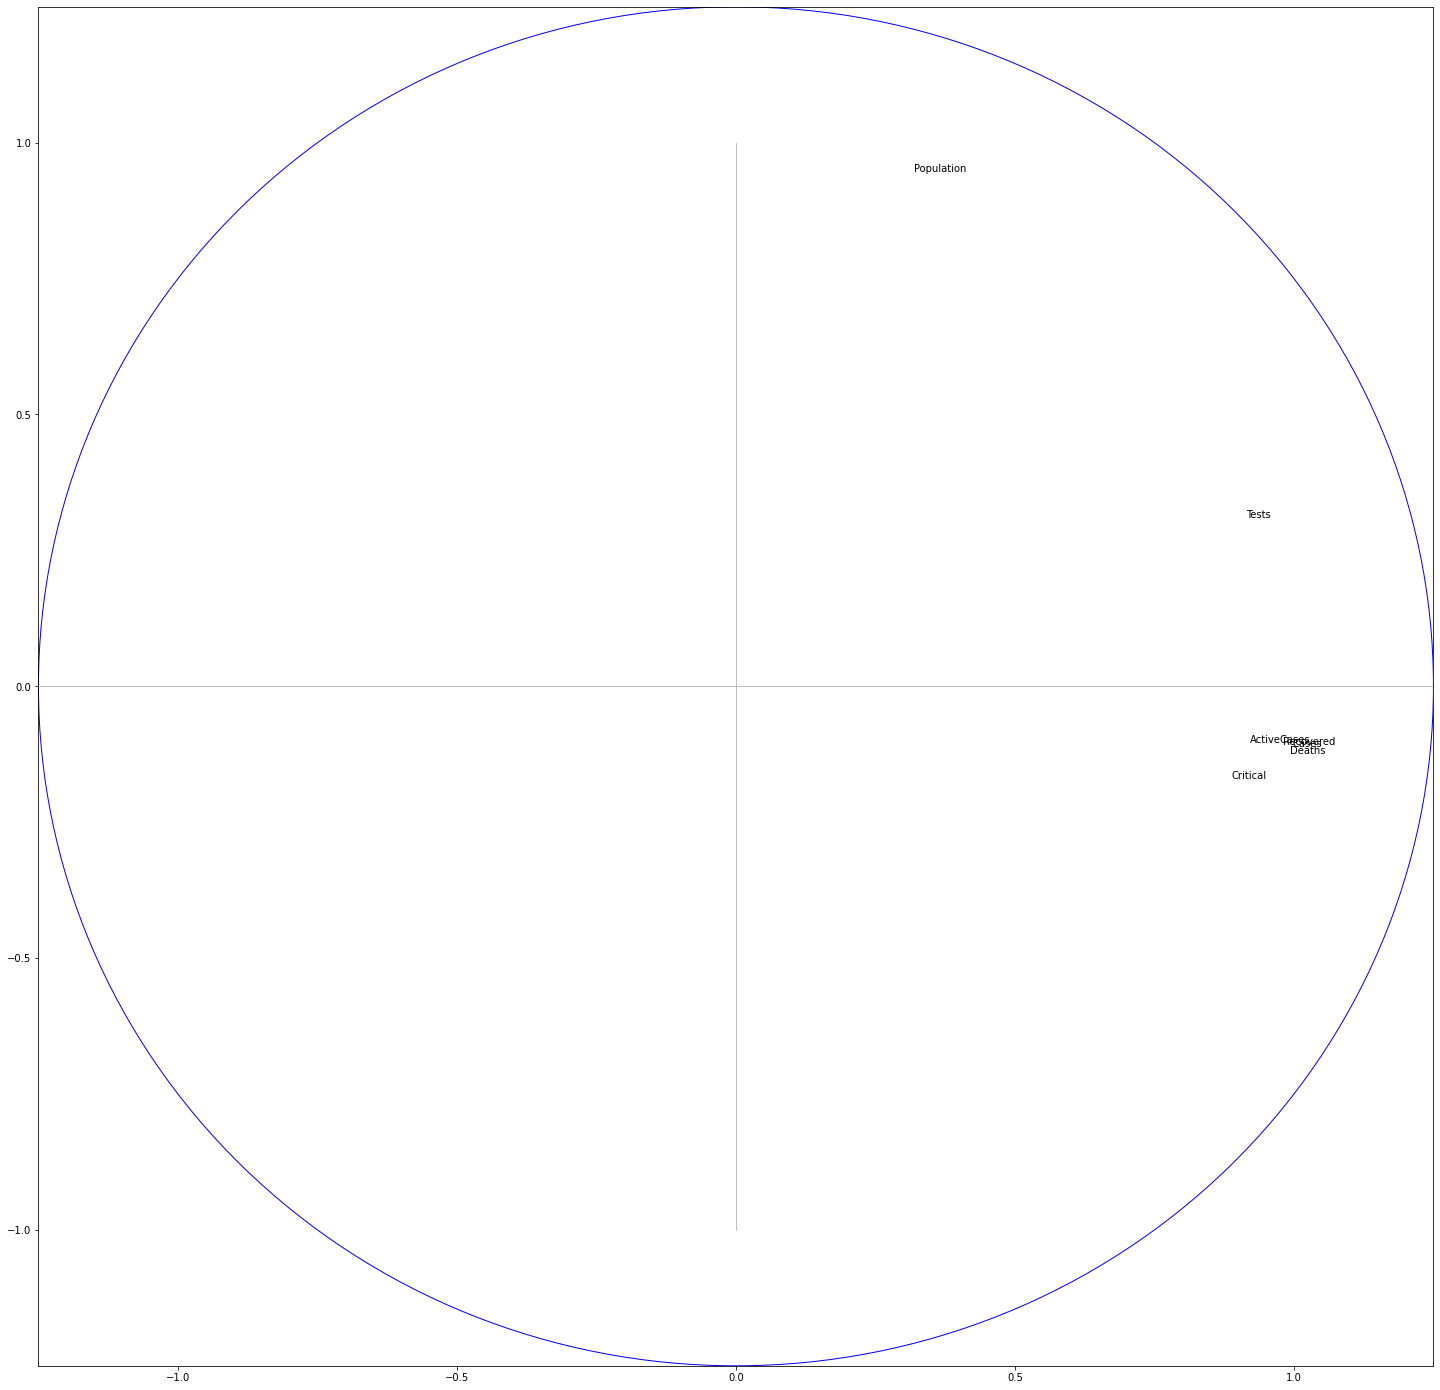

In [ ]:
#cercle des corrélations des variables
fig, axes = plt.subplots(figsize=(25,25))
axes.set_xlim(-1.25,1.25)
axes.set_ylim(-1.25,1.25)

#affichage noms des variables
for j in range(p):
 plt.annotate(Covid19_df.columns[j],(W[j,0],W[j,1]))

 #ajouter les axes
plt.plot([-1.25,1.25],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1.25,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()


In [ ]:
#cosinus carré des variables
cos2_var = W**2
print(pd.DataFrame({'idVar':Covid19_df.columns,'COS2_1':cos2_var[:,0],'COS2_2':cos2_var[:,1]}))


         idVar    COS2_1    COS2_2
0        Cases  0.995823  0.012157
1       Deaths  0.986791  0.015455
2    Recovered  0.961752  0.011497
3  ActiveCases  0.849112  0.010872
4     Critical  0.788415  0.029129
5        Tests  0.834741  0.096832
6   Population  0.101871  0.895282


In [ ]:
#contributions des variavles
ctrvar = cos2_var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/vp[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'idVar':Covid19_df.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

         idVar     CTR_1     CTR_2
0        Cases  0.180452  0.011349
1       Deaths  0.178815  0.014428
2    Recovered  0.174278  0.010733
3  ActiveCases  0.153866  0.010149
4     Critical  0.142867  0.027192
5        Tests  0.151262  0.090394
6   Population  0.018460  0.835756


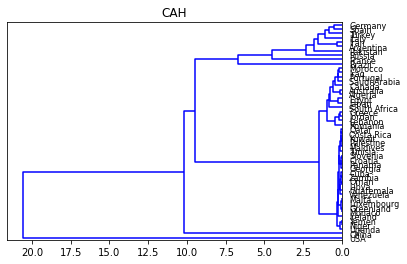

In [ ]:
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens
Z = linkage(X,method='ward',metric='euclidean')

#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=Covid19_df.index,orientation='left',color_threshold=0)
plt.show()

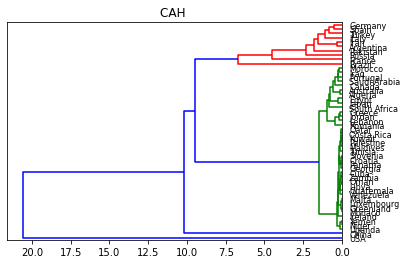

[4 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 3 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
plt.title('CAH ')
dendrogram(Z,labels=Covid19_df.index,orientation='left',color_threshold=7)
plt.show()

#découpage à la hauteur t = 7 : 4 classes obtenues
groupes_cah = fcluster(Z,t=7,criterion='distance')
print(groupes_cah)

In [ ]:
#index triés des groupes
import numpy as np
idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes
print(pd.DataFrame(Covid19_df.index[idg],groupes_cah[idg]))


        Country
1       Tunisia
1       Ireland
1     Palestine
1        Kuwait
1    Costa Rica
1      Slovenia
1         Egypt
1     Guatemala
1         Qatar
1         Libya
1     Venezuela
1          Oman
1       Algeria
1        Zambia
1          Cuba
1    Luxembourg
1        Uganda
1     Australia
1         Malta
1      Maldives
1         Niger
1         Yemen
1        Greece
1        Monaco
1     Greenland
1       Georgia
1       Croatia
1        Canada
1       Romania
1      Portugal
1          Iraq
1  South Africa
1       Morocco
1         Japan
1       Lebanon
1  Saudi Arabia
1        Panama
1        Jordan
2      Pakistan
2        Brazil
2        Russia
2        France
2         Italy
2     Argentina
2        Turkey
2       Germany
2          Iran
2         Spain
3         China
4           USA
